In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

## Load data

In [30]:
spike_pos = pd.read_csv('spike_pos.csv')

In [32]:
spike_pos = spike_pos.iloc[:,1:]

In [ ]:
## Set X and Y

In [37]:
X = np.array(spike_pos.iloc[:,1:-1])

In [38]:
y = np.array(spike_pos['pos'])

In [39]:
np.shape(X)

(9192, 55)

In [40]:
np.shape(y)

(9192,)

## Try many models

In [ ]:
## kernal = poly, c =1, one-vs-rest

In [66]:
poly = svm.SVC(kernel='poly', C=1)

In [67]:
cross_val_score(poly, X, y, cv=10)

array([0.21945946, 0.26623377, 0.26868906, 0.25488069, 0.27687296,
       0.25490196, 0.26499455, 0.32240437, 0.28008753, 0.22562979])

In [68]:
np.mean([0.21945946, 0.26623377, 0.26868906, 0.25488069, 0.27687296,
       0.25490196, 0.26499455, 0.32240437, 0.28008753, 0.22562979])

0.263415414

In [ ]:
## kernal = random basis function, c =1, one-vs-rest

In [61]:
rbf = svm.SVC(kernel='rbf', C=1)

In [64]:
cross_val_score(rbf, X, y, cv=10)

array([0.3372973 , 0.3961039 , 0.36294691, 0.40130152, 0.37567861,
       0.36819172, 0.42311887, 0.48415301, 0.47155361, 0.41840088])

In [65]:
np.mean([0.3372973 , 0.3961039 , 0.36294691, 0.40130152, 0.37567861,
       0.36819172, 0.42311887, 0.48415301, 0.47155361, 0.41840088])

0.40387463300000004

In [ ]:
## kernal = linear, one-vs-one, c =1

In [58]:
ovo = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')

In [59]:
cross_val_score(ovo, X, y, cv=10)

array([0.33081081, 0.3982684 , 0.3531961 , 0.40997831, 0.36264929,
       0.37472767, 0.4176663 , 0.48306011, 0.46608315, 0.42497262])

In [60]:
np.mean([0.33081081, 0.3982684 , 0.3531961 , 0.40997831, 0.36264929,
       0.37472767, 0.4176663 , 0.48306011, 0.46608315, 0.42497262])

0.40214127600000005

In [ ]:
## kernal = linear, c = 1, one-vs-rest

In [50]:
lin_clf = svm.LinearSVC()

In [52]:
lin_clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [69]:
cross_val_score(lin_clf, X, y, cv=10)

array([0.34054054, 0.39069264, 0.36186349, 0.40997831, 0.36156352,
       0.38017429, 0.4089422 , 0.48961749, 0.4726477 , 0.41073384])

In [70]:
np.mean([0.34054054, 0.39069264, 0.36186349, 0.40997831, 0.36156352,
       0.38017429, 0.4089422 , 0.48961749, 0.4726477 , 0.41073384])

0.402675402

In [245]:
## kernal = linear, c = 0.001, one-vs-rest

In [71]:
clf_c = svm.SVC(kernel='linear', C=0.001)

In [72]:
cross_val_score(clf_c, X, y, cv=10)

array([0.29945946, 0.33116883, 0.32177681, 0.30911063, 0.31921824,
       0.33442266, 0.32606325, 0.39234973, 0.34463895, 0.30887185])

In [73]:
np.mean([0.29945946, 0.33116883, 0.32177681, 0.30911063, 0.31921824,
       0.33442266, 0.32606325, 0.39234973, 0.34463895, 0.30887185])

0.32870804100000006

### Okay, it seems like performance of all models are not good enough (accuracy 0.4ish)
### Anyway, linear SVM (c=1, one-vs-rest) seems okay...

In [247]:
## Make prediction output

In [74]:
from sklearn.model_selection import KFold

In [90]:
kf = KFold(n_splits=10, random_state = 1)
kf.get_n_splits(X)

10

In [110]:
train = []
test = []
for train_index, test_index in kf.split(X):
    train.append(train_index)
    test.append(test_index)
    #print("TRAIN:", train_index1[0], "TEST:", test_index1[0])

In [118]:
X_train1, X_test1 = X[train[0]], X[test[0]]
y_train1, y_test1 = y[train[0]], y[test[0]]

In [119]:
np.shape(X_train1)

(8272, 55)

In [120]:
np.shape(X_test1)

(920, 55)

In [121]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train1, y_train1)
clf.score(X_test1, y_test1) 

0.33043478260869563

In [123]:
y_pred1 = clf.predict(X_test1) # y_test1

In [125]:
np.mean(y_pred1 == y_test1) # score와 동일

0.33043478260869563

In [265]:
sc_list = []
y_pred_list = []
y_real_list = []
for i in range(10):
    X_train, X_test = X[train[i]], X[test[i]]
    y_train, y_test = y[train[i]], y[test[i]]

    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    sc = clf.score(X_test, y_test)
    sc_list.append(sc)

    y_pred = clf.predict(X_test)
    y_pred_list.append(y_pred)
    y_real_list.append(y[test[i]])

In [267]:
sc_list

[0.33043478260869563,
 0.36630434782608695,
 0.3264417845484222,
 0.3438520130576714,
 0.4091403699673558,
 0.37323177366702937,
 0.44069640914036995,
 0.44178454842219805,
 0.4689880304678999,
 0.4102285092491839]

In [268]:
pred_place_ls = []
for i in range(10):
    place = np.zeros((4,4))
    place[0,0] = np.sum(y_pred_list[i] == 1)/len(y_pred_list[i])
    place[0,1] = np.sum(y_pred_list[i] == 2)/len(y_pred_list[i])
    place[0,2] = np.sum(y_pred_list[i] == 3)/len(y_pred_list[i])
    place[0,3] = np.sum(y_pred_list[i] == 4)/len(y_pred_list[i])
    place[1,0] = np.sum(y_pred_list[i] == 5)/len(y_pred_list[i])
    place[1,1] = np.sum(y_pred_list[i] == 6)/len(y_pred_list[i])
    place[1,2] = np.sum(y_pred_list[i] == 7)/len(y_pred_list[i])
    place[1,3] = np.sum(y_pred_list[i] == 8)/len(y_pred_list[i])
    place[2,0] = np.sum(y_pred_list[i] == 10)/len(y_pred_list[i])
    place[2,1] = np.sum(y_pred_list[i] == 10)/len(y_pred_list[i])
    place[2,2] = np.sum(y_pred_list[i] == 11)/len(y_pred_list[i])
    place[2,3] = np.sum(y_pred_list[i] == 12)/len(y_pred_list[i])
    place[3,0] = np.sum(y_pred_list[i] == 14)/len(y_pred_list[i])
    place[3,1] = np.sum(y_pred_list[i] == 14)/len(y_pred_list[i])
    place[3,2] = np.sum(y_pred_list[i] == 15)/len(y_pred_list[i])
    place[3,3] = np.sum(y_pred_list[i] == 16)/len(y_pred_list[i])

    pred_place_ls.append(place)

In [269]:
pred_place_ls[0] # y_pred가 예측한 쥐가 존재하는 곳

array([[0.        , 0.0673913 , 0.14021739, 0.12173913],
       [0.        , 0.02608696, 0.20869565, 0.03695652],
       [0.01521739, 0.01521739, 0.10543478, 0.18043478],
       [0.01847826, 0.01847826, 0.06304348, 0.01630435]])

In [270]:
real_place_ls = []
for i in range(10):
    place = np.zeros((4,4))
    place[0,0] = np.sum(y_real_list[i] == 1)/len(y_real_list[i])
    place[0,1] = np.sum(y_real_list[i] == 2)/len(y_real_list[i])
    place[0,2] = np.sum(y_real_list[i] == 3)/len(y_real_list[i])
    place[0,3] = np.sum(y_real_list[i] == 4)/len(y_real_list[i])
    place[1,0] = np.sum(y_real_list[i] == 5)/len(y_real_list[i])
    place[1,1] = np.sum(y_real_list[i] == 6)/len(y_real_list[i])
    place[1,2] = np.sum(y_real_list[i] == 7)/len(y_real_list[i])
    place[1,3] = np.sum(y_real_list[i] == 8)/len(y_real_list[i])
    place[2,0] = np.sum(y_real_list[i] == 10)/len(y_real_list[i])
    place[2,1] = np.sum(y_real_list[i] == 10)/len(y_real_list[i])
    place[2,2] = np.sum(y_real_list[i] == 11)/len(y_real_list[i])
    place[2,3] = np.sum(y_real_list[i] == 12)/len(y_real_list[i])
    place[3,0] = np.sum(y_real_list[i] == 14)/len(y_real_list[i])
    place[3,1] = np.sum(y_real_list[i] == 14)/len(y_real_list[i])
    place[3,2] = np.sum(y_real_list[i] == 15)/len(y_real_list[i])
    place[3,3] = np.sum(y_real_list[i] == 16)/len(y_real_list[i])

    real_place_ls.append(place)

In [271]:
real_place_ls[0] # 실제 쥐가 있었던 공간.

array([[0.        , 0.0923913 , 0.10217391, 0.09891304],
       [0.        , 0.05978261, 0.19891304, 0.11195652],
       [0.04565217, 0.04565217, 0.09021739, 0.06413043],
       [0.01304348, 0.01304348, 0.07608696, 0.04673913]])

## visulaztion

In [177]:
import seaborn as sns
from pylab import savefig

In [281]:
var1 = 'pred_place' + str(i) +'.png'

In [282]:
var1

'pred_place0.png'

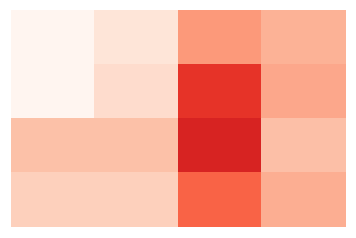

In [289]:
for i in range(0,10):
    ax0 = sns.heatmap(pred_place_ls[i], xticklabels=False,yticklabels=False, cmap = 'Reds', vmax = 0.25, cbar = False)
    ax1 = sns.heatmap(real_place_ls[i], xticklabels=False,yticklabels=False, cmap = 'Reds', vmax = 0.25, cbar = False)

    fig0 = ax0.get_figure()
    fig1 = ax1.get_figure()
    
    fig0.savefig("pred_place" + str(i) +".png")
    fig1.savefig("real_place" + str(i) +".png")

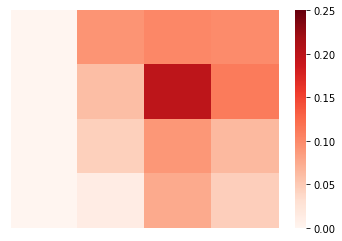

In [199]:
ax0 = sns.heatmap(place, xticklabels=False,yticklabels=False, cmap = 'Reds', vmax = 0.25)

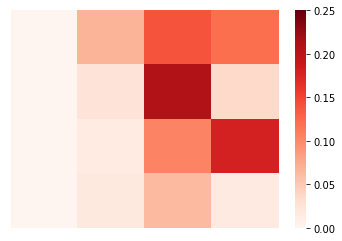

In [200]:
ax1 = sns.heatmap(pred_place,xticklabels=False,yticklabels=False, cmap = 'Reds', vmax = 0.25)